In [3]:
! pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 2.8 MB/s eta 0:02:20
   ---------------------------------------- 1.0/390.3 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 1.6/390.3 MB 2.7 MB/s eta 0:02:24
   ---------------------------------------- 2.4/390.3 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 3.1/390.3 MB 3.0 MB/s eta 0:02:08
   ---------------------------------------- 3.7/390.3 MB 3.1 MB/s eta 0:02:05
   ---------------------------------------- 4.5/390.3 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 4.7/390.3 MB 3.1 MB/s eta 0:02:04
    --------------------------------------- 5.2/390.3 MB 3.0 MB/s eta 0:02:11
    --------------------------------------- 6.3/390.3 MB 3.1 MB/s eta 0:02:05
    --------------------------------------- 7.1/390.3 MB 3.1 MB/s eta 0:02:03


In [33]:
! pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Массивы train_images и train_labels — это данные, которые использует модель для обучения
# Массивы test_images и test_labels используются для тестирования модели

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


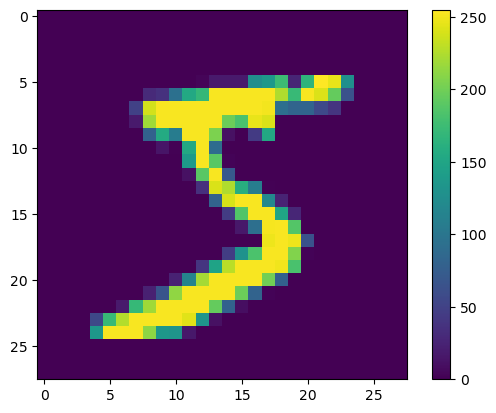

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8778 - loss: 0.4312
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9666 - loss: 0.1163
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9768 - loss: 0.0769
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0547
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9856 - loss: 0.0453
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9901 - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0.0245
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9943 - loss: 0.0195
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9960 - loss: 0.0134


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1207
Test accuracy: 0.9743000268936157


In [16]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

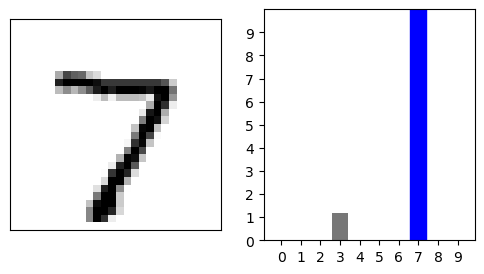

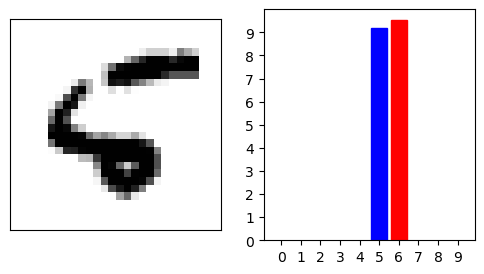

In [49]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
 # plt.xticks([])
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 10]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [25]:
predictions[6]

array([-13.317934 ,  -7.2478533,  -8.778854 , -14.890166 ,   9.733418 ,
        -8.950033 , -10.579201 ,  -2.6702542,   1.2802932,   1.3196733],
      dtype=float32)

In [5]:
boston = pd.read_csv('F:/Data/boston_dataset.csv', delim_whitespace = True,  header = None)
boston.head()

C:\Users\ripea\AppData\Local\Temp\ipykernel_16724\1148745718.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv('F:/Data/boston_dataset.csv', delim_whitespace = True,  header = None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
               'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT', 'PRICE']

In [7]:
boston.columns = feature_name
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X = boston.drop('PRICE', axis = 1)
y = boston['PRICE']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (404, 13), y_train shape: (404,)
x_test shape: (102, 13), y_test shape: (102,)


In [10]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [11]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
model = Sequential()
model.add(Dense(128, input_dim = 13, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train_scaled, y_train, validation_split = 0.2, epochs = 100, batch_size=5)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 541.8104 - mean_absolute_error: 21.3941 - val_loss: 176.8413 - val_mean_absolute_error: 11.4167
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 135.3384 - mean_absolute_error: 8.9995 - val_loss: 28.9335 - val_mean_absolute_error: 3.8164
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 31.3620 - mean_absolute_error: 4.1822 - val_loss: 25.1695 - val_mean_absolute_error: 3.4528
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 22.4145 - mean_absolute_error: 3.5216 - val_loss: 22.6128 - val_mean_absolute_error: 3.2968
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 16.7652 - mean_absolute_error: 2.9957 - val_loss: 19.9291 - val_mean_absolute_error: 3.0482
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.7026 - mean_absolute_error: 2.6744 - val_loss: 18.3665 - val_mean_absolute_error: 2.9582
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.4541 - mean_absolute_error

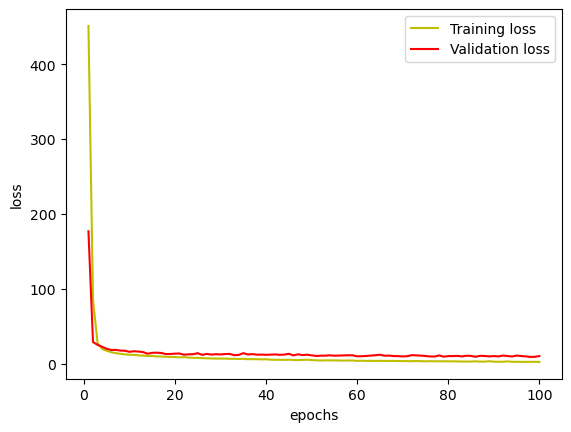

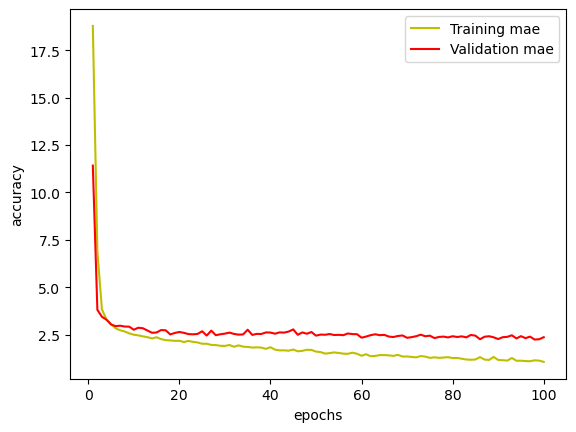

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#acc = history.history['mean_absolute_error']
#val_acc = history.history['val_mean_absolute_error']
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label = 'Training mae')
plt.plot(epochs, val_acc, 'r', label = 'Validation mae')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [16]:
predictions = model.predict(x_test_scaled[:5])
print('pred', predictions)
print('real', y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
pred [[27.873014]
 [35.358757]
 [15.585435]
 [24.334751]
 [16.91256 ]]
real 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64


In [17]:
mse_neural, mae_neural = model.evaluate(x_test_scaled, y_test)
print('mae', mae_neural)
print('mse', mse_neural)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.6287 - mean_absolute_error: 2.3083
mae 2.391859769821167
mse 13.417372703552246


In [ ]:
! pip uninstall scikit-learn
! pip install scikit-learn

In [37]:
from sklearn import linear_model
#from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr_model= linear_model.LinearRegression()
lr_model.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('mae', mae_lr)
print('mse', mse_lr)


ImportError: cannot import name 'validate_data' from 'sklearn.utils.validation' (F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\sklearn\utils\validation.py)